In [21]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
import plotly.express as px #для визуализации

from plotly.subplots import make_subplots
from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn import preprocessing #предобработка
from sklearn.model_selection import train_test_split #разделение выборки

In [22]:
plt.style.use('seaborn')

C:\Users\sadeyes\AppData\Local\Temp\ipykernel_2088\240305066.py:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



In [23]:
data = pd.read_csv(r'F:\SF-DS-practice\Block-4\Module-2. Regression\data\insurance.zip')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


* age — возраст основного бенефициара;
* sex — пол страхового подрядчика;
* bmi — индекс массы тела ($кг/м^2$), в идеале — от 18.5 до 24.9;
* children — количество детей, охваченных медицинской страховкой;
* smoker — является ли человек курящим;
* region — жилой район США (северо-восток, юго-восток, северо-запад, юго-запад);
* charges (целевой признак) — индивидуальные медицинские расходы, оплачиваемые медицинской страховкой.


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


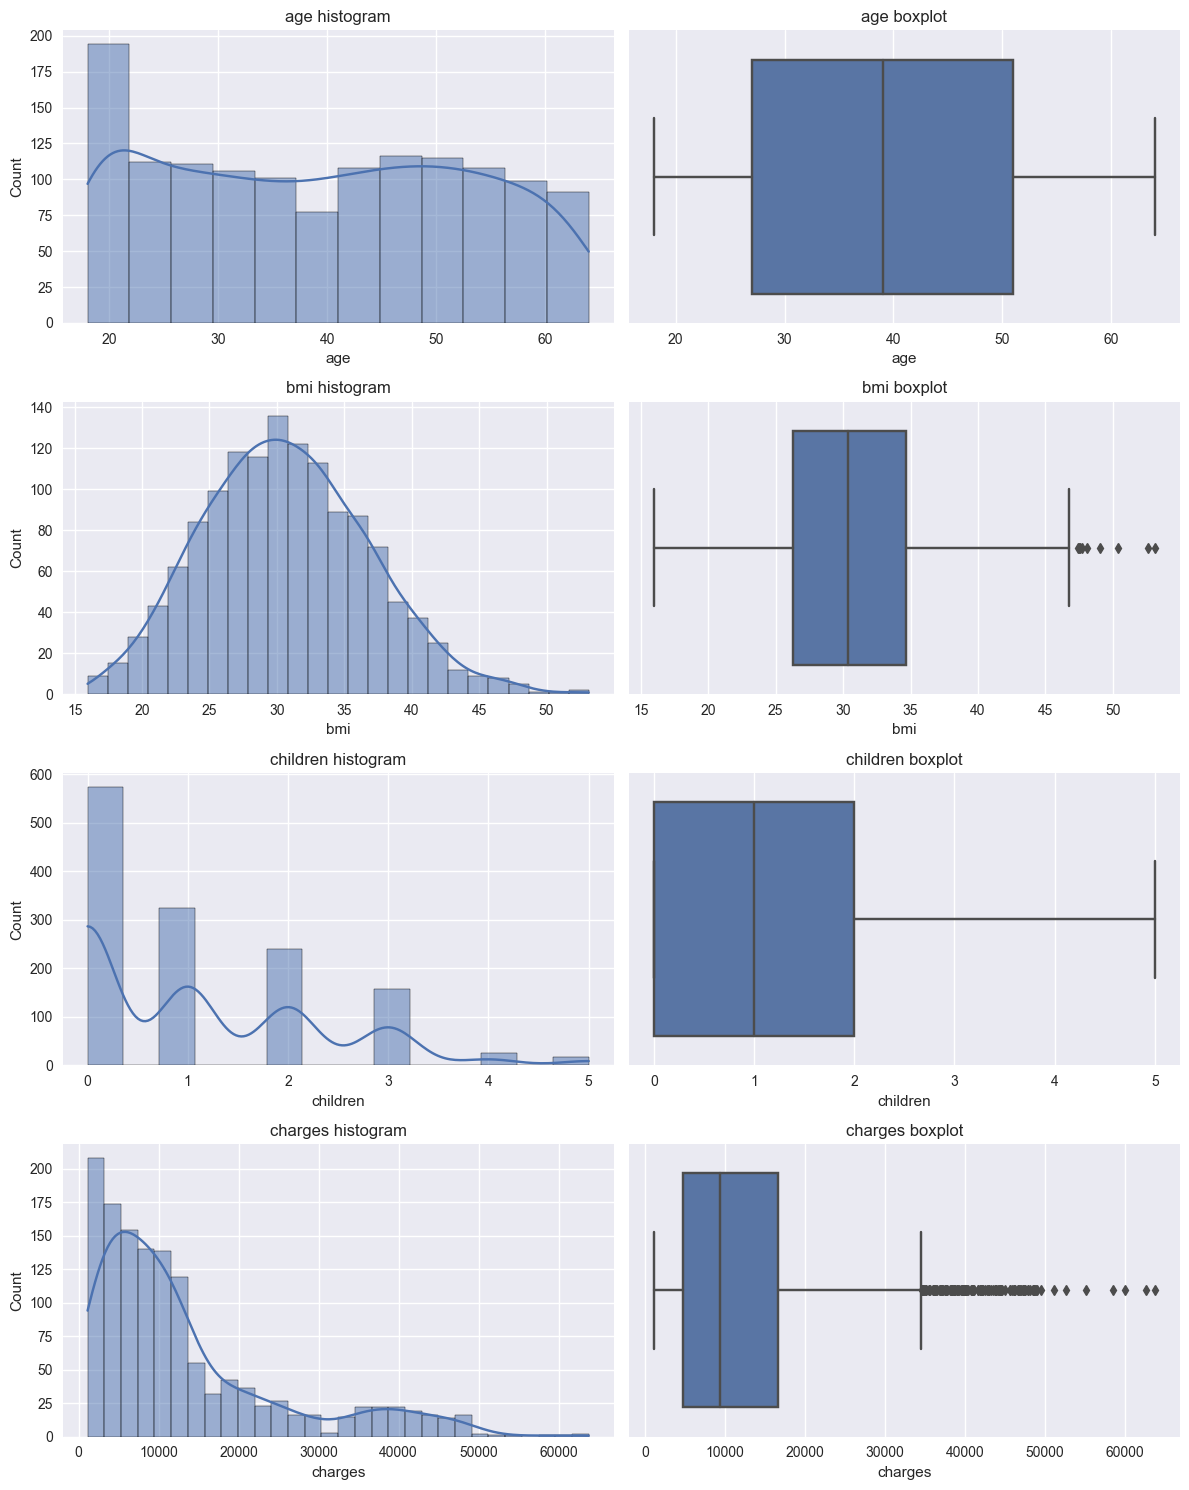

In [25]:
num_features = ['age', 'bmi', 'children', 'charges']

def make_histbox(data, features:list):
    fig, axs = plt.subplots(len(features), 2, figsize=(12, 15))
    for feature, row in zip(features, range(len(features))):
        ax, ay = axs[row, 0], axs[row, 1]
        sns.histplot(data, x=feature, ax=ax, kde=True)
        sns.boxplot(data, x=feature, ax=ay)
        ax.set_title(feature + ' histogram')
        ay.set_title(feature + ' boxplot')
    fig.tight_layout()
make_histbox(data, num_features)

In [26]:
grouped_by_sex = data.groupby(['sex', 'smoker'], as_index=False)['charges'].median()
px.bar(grouped_by_sex,
       x='sex',
       y='charges',
       color='smoker',
       barmode='group',
       title='Распределение медианных медицинских расходов в разрезе пола и курения',
       height=500,
       width=750
)

In [27]:
px.scatter(data,
    x='charges',
    y='age',
    color='smoker',
    title='Диаграммма рассеяния расходов в разрезе возраста и курения',
    height=500,
    width=900
)

In [28]:
data['smoker'] = data['smoker'].apply(lambda x: int('yes' in x))
data['sex'] = data['sex'].apply(lambda x: int(x == 'male'))
data = pd.get_dummies(data)
data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [29]:
features = data.drop(columns='charges').columns
X, y = data[features], data['charges']

In [30]:
# 6.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'X_train:{X_train.shape}')
print(f'y_test:{y_test.shape}')

X_train:(1070, 9)
y_test:(268,)


In [31]:
# 6.2
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train)
print('Intercept =', np.round(lr_model.intercept_, 2))

Intercept = -12390.8


In [32]:
y_train_predict = lr_model.predict(X_train)
y_test_predict = lr_model.predict(X_test)

def print_metrics(y_train_predict, y_test_predict):
    print('Train:')
    print('R^2:', np.round(metrics.r2_score(y_train, y_train_predict), 3))
    print('MAE:', np.round(metrics.mean_absolute_error(y_train, y_train_predict)))
    print('MAPE, %:', np.round(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100))
    print()
    print('Test')
    print('R^2:', np.round(metrics.r2_score(y_test, y_test_predict), 3))
    print('MAE:', np.round(metrics.mean_absolute_error(y_test, y_test_predict)))
    print('MAPE, %:', np.round(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100))

print_metrics(y_train_predict, y_test_predict)

Train:
R^2: 0.742
MAE: 4208.0
MAPE, %: 42.0

Test
R^2: 0.784
MAE: 4181.0
MAPE, %: 47.0


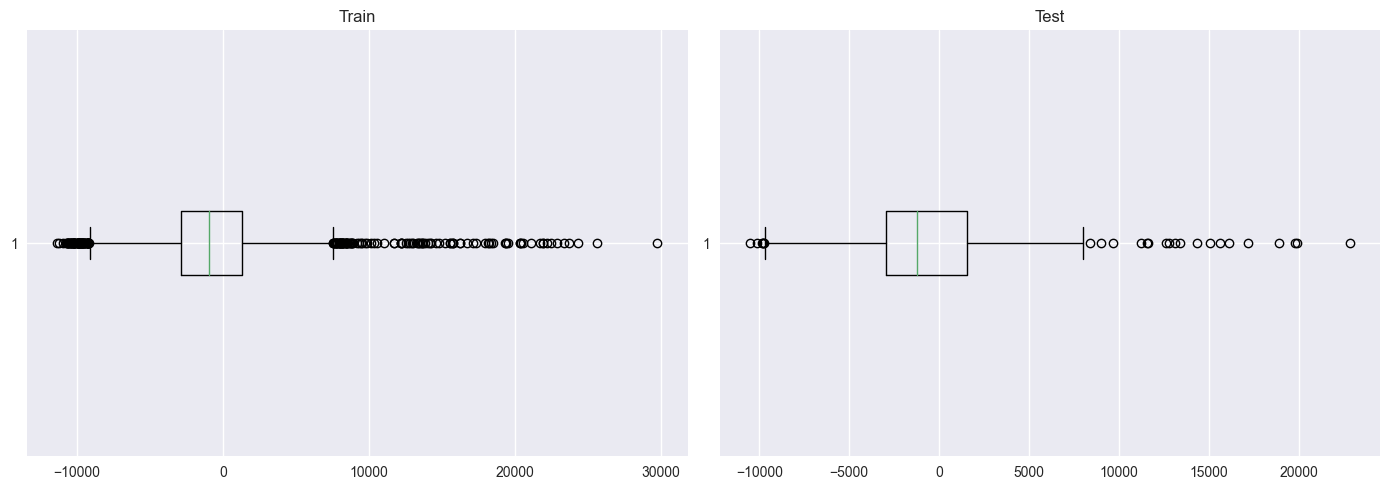

In [33]:
# 6.4
train_errors = y_train - y_train_predict
test_errors = y_test - y_test_predict

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].boxplot(train_errors, vert=False)
ax[0].set_title('Train')
ax[1].boxplot(test_errors, vert=False)
ax[1].set_title('Test')
fig.tight_layout()

In [34]:
# 6.5
mm_scaler = preprocessing.MinMaxScaler()
mm_scaler.fit(X_train)

X_train_scaled = mm_scaler.transform(X_train)
X_test_scaled = mm_scaler.transform(X_test)

poly = preprocessing.PolynomialFeatures(
    degree=2,
    include_bias=False
)
poly.fit(X_train_scaled)

X_train_scaled_poly = poly.transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)
print(X_train_scaled_poly.shape)

(1070, 54)


In [35]:
# 6.6
lr_model.fit(X_train_scaled_poly, y_train)
y_test_predict_poly = lr_model.predict(X_test_scaled_poly)
print('R^2 score for test poly:', np.round(metrics.r2_score(y_test, y_test_predict_poly), 3))

R^2 score for test poly: 0.867


In [36]:
# 6.7
lr_model.coef_

array([-4.36384883e+16,  1.70065514e+17,  8.72784439e+13, -1.83638783e+15,
        4.08636441e+15,  1.88031184e+16,  1.71720308e+16,  1.82356270e+16,
        1.00446951e+16,  8.48800000e+03,  9.54000000e+02,  1.01200000e+03,
       -1.64000000e+03,  1.68000000e+02,  4.36384883e+16,  4.36384883e+16,
        4.36384883e+16,  4.36384883e+16, -1.43233479e+17,  6.40500000e+02,
       -1.28212500e+03,  2.76250000e+02, -2.68320351e+16, -2.68320351e+16,
       -2.68320351e+16, -2.68320351e+16, -9.71362500e+03,  1.49334375e+03,
        5.48928750e+04, -8.72784439e+13, -8.72784439e+13, -8.72784439e+13,
       -8.72784439e+13, -1.96800000e+03, -2.24000000e+03,  1.83638783e+15,
        1.83638783e+15,  1.83638783e+15,  1.83638783e+15, -3.57842467e+14,
       -3.72852194e+15, -3.72852194e+15, -3.72852194e+15, -3.72852194e+15,
        1.76182225e+16,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.92493100e+16,  0.00000000e+00,  0.00000000e+00,  1.81857138e+16,
        0.00000000e+00,  

In [37]:
# 6.8
lasso_reg = linear_model.Lasso(max_iter=2000)
lasso_reg.fit(X_train_scaled_poly, y_train)

y_test_predict_poly_lasso = lasso_reg.predict(X_test_scaled_poly)

print('Test')
print('R^2:', np.round(metrics.r2_score(y_test, y_test_predict_poly_lasso), 3))
print('MAE:', np.round(metrics.mean_absolute_error(y_test, y_test_predict_poly_lasso)))
print('MAPE, %:', np.round(metrics.mean_absolute_percentage_error(y_test, y_test_predict_poly_lasso)*100))

Test
R^2: 0.867
MAE: 2719.0
MAPE, %: 30.0


In [38]:
lasso_reg.coef_

array([ 3.24221653e+03, -4.92313816e+02,  5.07612317e+03,  4.58362056e+03,
        1.97928569e+03,  1.88025707e+02, -4.70775218e+02,  5.83657101e+02,
       -2.43543456e+02,  8.29826751e+03,  7.74581954e+02,  8.44448593e+02,
       -1.20775688e+03,  1.34809915e+02, -1.04309726e+03, -0.00000000e+00,
        1.16964229e+03,  1.61765564e+03, -0.00000000e+00,  5.05847740e+02,
       -1.13425152e+03,  2.65796922e+02, -1.22240479e+03,  0.00000000e+00,
        2.36213242e+02, -5.80031340e+02, -8.17963257e+03,  1.29487768e+03,
        5.47148553e+04,  3.58531873e+03,  2.40690210e+03, -9.63549427e+02,
        0.00000000e+00, -1.67464337e+03, -2.05436459e+03,  1.94204864e+03,
        1.95394442e+03, -0.00000000e+00, -1.06364416e+03,  8.00606774e+00,
        5.93688978e+02, -0.00000000e+00, -2.30643423e+02,  1.97933477e+03,
        6.31615519e+02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

In [39]:
ridge_reg = linear_model.Ridge()
ridge_reg.fit(X_train_scaled_poly, y_train)

y_test_predict_poly_ridge = ridge_reg.predict(X_test_scaled_poly)

print('Test')
print('R^2:', np.round(metrics.r2_score(y_test, y_test_predict_poly_ridge), 3))
print('MAE:', np.round(metrics.mean_absolute_error(y_test, y_test_predict_poly_ridge)))
print('MAPE, %:', np.round(metrics.mean_absolute_percentage_error(y_test, y_test_predict_poly_ridge)*100))

Test
R^2: 0.863
MAE: 2861.0
MAPE, %: 31.0
